1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

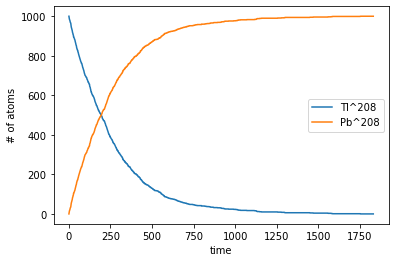

In [29]:
import numpy as np
from numpy import random as npr
from matplotlib import pyplot as plt

N_Tl0 = 1000
N_Tl = N_Tl0
hl = 3.052*60 #tau
t = int(10*hl)  #Tempo va da 0 a dieci volte tau
N_Tl_t=[N_Tl]
time=np.arange(t+1)

#def decay_prob():
#    return 1-2**(-1/hl)


for i in range(t):
    x=npr.rand(N_Tl)
    N_Tl=N_Tl-len(x[x<(1-2**(-1/hl))])
    N_Tl_t.append(N_Tl)

plt.figure(figsize=(6,4))
plt.plot(time,N_Tl_t, label='Tl^208')
plt.plot(time,N_Tl0-np.array(N_Tl_t), label='Pb^208')
plt.xlabel("time")
plt.ylabel("# of atoms")
plt.legend()        

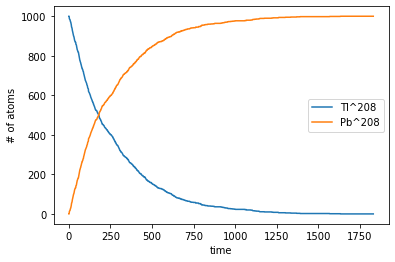

In [31]:
#Same exercise with inverse transform method

def expon_pdf(x, mu=np.log(2)/hl):
    """PDF of exponential distribution."""
    return mu*np.exp(-mu*x)

def expon_icdf(z, mu=np.log(2)/hl):  #such definition are for e and from calculation since we have 2 we obtain this
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-z)/mu

u = np.random.uniform(0, 1, N_Tl0)
v = expon_icdf(u)

Nt_Tl = []
Nt_Tl.append(N_Tl0)

for j in range(t):
    Nt_Tl.append(N_Tl0-len(v[v<j]))
                 
plt.figure(figsize=(6,4))
plt.plot(time,Nt_Tl, label='Tl^208')
plt.plot(time,N_Tl0-np.array(Nt_Tl), label='Pb^208')
plt.xlabel("time")
plt.ylabel("# of atoms")
plt.legend() 


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [53]:
from scipy import constants
from math import pi


#Definition of constants
e  = constants.elementary_charge
e0 = constants.epsilon_0
a0 = 4*np.pi*e0*constants.hbar**2/(constants.m_e*e**2)

def impact(theta, Z, E):
    return (Z*e**2)/(np.tan(theta/2)*pi*e0*E*2)

#Definition of physical quantities
E = 7.7e6*e
Z = 79
N = 1e6
theta_back=pi/2

#Definition of a function evaluating scattering angle from impact parameter

#Definition of the beam
mu   = [0,0]
cov  = np.eye(2)*(a0*0.01)**2  #Definition of covariance matrix for the beam (coordinates are independent variables)
beam = np.random.multivariate_normal(mu, cov, int(N)).T #This generates two rows of N elements which indeed are x,y coordinates

# compute backscattered particles
b = np.sqrt(np.sum(beam**2, axis=0)) #Impact parameter aka Pitagora theorem
back_scatt = b[b<impact(theta_back, Z, E)]
print("The fraction of backscattered particles is: ", len(back_scatt)*100/N, "%")




The fraction of backscattered particles is:  0.1534 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [57]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

# Monte Carlo integration with hit/miss method
N=1000000
count=0
for i in range(N):
    x=npr.uniform(0,2)
    y=npr.random()    #The upper border is clearly 1...
    if y<f(x): count+=1
I=2*count/N  #equal to count*A/N

p = count/N
err_I = 2*np.sqrt(N*p*(1-p))/N    #variance of count, following binomial distribution, is np(1-p)
print("hit/miss method = %6.5f +- %6.5f"%(I, err_I))

# Monte Carlo integration with mean value method

V=2 #This is b-a in mean value definition
x2= npr.rand(N)
I2= V*np.sum(f(x2))/N  #This is probing randomly the domain of the function.. Alternatively one could use linspace
err_I2 = 2*np.sqrt((np.sum(f(x2)**2)/N-np.sum(f(x2)/N)**2)/N)
print("mean value method = %6.5f +- %6.5f"%(I2, err_I2))


hit/miss method = 1.45166 +- 0.00089
mean value method = 1.45178 +- 0.00053


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [64]:
#Definisce funzione che ritorna un array con il valore della funzione per ciascun punto randomico nel dominio
def f(x):
    sum_sq = np.sum(x**2, axis=0)
    return np.array([1 if (s<=1) else 0 for s in sum_sq]) 


#Calcolo l'integale con il mean value method
x = npr.uniform(-1,1,(2,N)) #Conviene fare così per generalizzazione a N dimensioni
I = 2**2*np.sum(f(x))/N
err_I = 2*np.sqrt((np.sum(f(x)**2)/N-np.sum(f(x)/N)**2)/N)
print("The integral in 2D is:", I ,"+-", err_I)

#Generalizzazione a n dimensioni
n=10
x2 = npr.uniform(-1,1,(n,N)) #Conviene fare così per generalizzazione a N dimensioni
I2 = 2**n*np.sum(f(x2))/N
err_I2 = 2*np.sqrt((np.sum(f(x2)**2)/N-np.sum(f(x2)/N)**2)/N)
print("The integral in nD is:", I2 ,"+-", err_I2)
    

The integral in 2D is: 3.139972 +- 0.0008216544041164748
The integral in nD is: 2.552832 +- 9.973534881876134e-05


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [69]:
def w(x):
    return 1/(np.sqrt(x))

def f(x):
    return x**-0.5/(np.exp(x)+1)


#Let's evaluate w integral between 0 and 1.. Che chiaramente i realtà fa 2
N = int(1e6)
xw = npr.rand(N)
Iw = 1*sum(w(xw))/N
print(Iw)

#Calcolo integrale totale con importance slicing method
x = np.random.rand(N)**2
I = Iw/N*np.sum(f(x)/w(x))
print("Integral: ", I)

1.998594615172423
Integral:  0.8381661628147835
